<a href="https://colab.research.google.com/github/RahulJuluru2/Unit2Practice/blob/main/Demo_Covariance_Coeff_of_Deter_(R2)_Gaussian_Distribution_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

#### Walkthrough

### Learning Objectives:

At the end of the experiment, you will be able to undertand :

 * Variance
 * Standard Deviation
 * Covariance
 * Correlation Coefficient
 * Coefficient of Determination
 * Gaussian Distribution



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

#@title Run this cell to upload the data
%%capture
!wget https://cdn.extras.talentsprint.com/IOT/Data/data1.txt
!wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Iris.csv
!wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/titanic.csv


In [3]:
data=pd.read_csv('data1.txt',header=None)
data.rename(columns={0:'Visitor_Count',1:'Profit'},inplace=True)
data.head()

,Visitor_Count,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
## Discarding values beyond 2 decimal points
f=lambda x:'%.2f'%x
data=data.applymap(f).astype(float)
data.head()

,Visitor_Count,Profit
0,6.11,17.59
1,5.53,9.13
2,8.52,13.66
3,7.00,11.85
4,5.86,6.82


In [5]:
X=data.iloc[:,0].values
Y=data.iloc[:,1].values
X_Mean=np.mean(X)
print('X_mean : ', X_Mean)
Y_Mean=np.mean(Y)
print('Y_mean : ', Y_Mean)

X_mean :  8.16020618556701
Y_mean :  5.839278350515464


### Variance
* For Population


$ \sigma ^2 = {\frac{1}{N}\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 } }$


### Standard Deviation 

$ s_N = \sqrt {\frac{1}{N}\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 } }$

* For Sample replace denominator with (N-1)
* Standard Deviation = Square Root of Variance
* Concept of Population and Sample ? Check yourself.

#### Calulating Variation in X

In [6]:
# Using Function
X_var=np.var(X,ddof=1) ## if ddof=0 variance for population
print(X_var)

14.97642079037801


In [7]:
# From Scratch 
n=len(X) # Total Data points
np.sum((X-X_Mean)**2)/(n-1) ## Sample

14.97642079037801

#### Calulating Variation in Y

In [8]:
Y_var=np.var(Y,ddof=1)
Y_var

30.361098432130586

#### Both can be calculated at once

In [9]:
# Using NumPyt
Mat_XY=data.values
print(Mat_XY,'\n ')
print('Variance within each feature : \n')
np.var(Mat_XY,ddof=1,axis=0)

[[ 6.11 17.59]
 [ 5.53  9.13]
 [ 8.52 13.66]
 [ 7.   11.85]
 [ 5.86  6.82]
 [ 8.38 11.89]
 [ 7.48  4.35]
 [ 8.58 12.  ]
 [ 6.49  6.6 ]
 [ 5.05  3.82]
 [ 5.71  3.25]
 [14.16 15.51]
 [ 5.73  3.16]
 [ 8.41  7.23]
 [ 5.64  0.72]
 [ 5.38  3.51]
 [ 6.37  5.3 ]
 [ 5.13  0.56]
 [ 6.43  3.65]
 [ 7.07  5.39]
 [ 6.19  3.14]
 [20.27 21.77]
 [ 5.49  4.26]
 [ 6.33  5.19]
 [ 5.56  3.08]
 [18.95 22.64]
 [12.83 13.5 ]
 [10.96  7.05]
 [13.18 14.69]
 [22.2  24.15]
 [ 5.25 -1.22]
 [ 6.59  6.  ]
 [ 9.25 12.13]
 [ 5.89  1.85]
 [ 8.21  6.54]
 [ 7.93  4.56]
 [ 8.1   4.12]
 [ 5.61  3.39]
 [12.84 10.12]
 [ 6.35  5.5 ]
 [ 5.41  0.56]
 [ 6.88  3.91]
 [11.71  5.39]
 [ 5.77  2.44]
 [ 7.82  6.73]
 [ 7.09  1.05]
 [ 5.07  5.13]
 [ 5.8   1.84]
 [11.7   8.  ]
 [ 5.54  1.02]
 [ 7.54  6.75]
 [ 5.31  1.84]
 [ 7.42  4.29]
 [ 7.6   5.  ]
 [ 6.33  1.42]
 [ 6.36 -1.42]
 [ 6.27  2.48]
 [ 5.64  4.6 ]
 [ 9.31  3.96]
 [ 9.45  5.41]
 [ 8.83  5.17]
 [ 5.18 -0.74]
 [21.28 17.93]
 [14.91 12.05]
 [18.96 17.05]
 [ 7.22  4.89]
 [ 8.3   5

array([14.97642079, 30.36109843])

In [10]:
# Using Pandas
data.var(axis=0)

Visitor_Count    14.976421
Profit           30.361098
dtype: float64

#### Visualizing the data

X_mean :  8.16020618556701
Y_mean :  5.839278350515464 




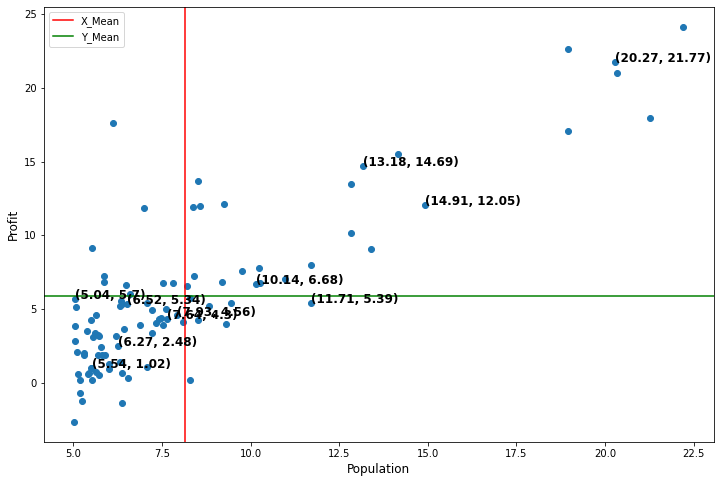

In [11]:
print('X_mean : ', X_Mean)
print('Y_mean : ', Y_Mean,'\n\n')
plt.figure(figsize=(12,8))
plt.scatter(X,Y)
### Plotting few coordinates of data points on the Graph
count=0
for i_x, i_y in zip(X, Y):
    if (count%7==0) and (count>20):
        plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y),fontsize=12,fontweight='bold')
    count=count+1
#############################
plt.axvline(x=X_Mean,label='X_Mean',color='r')
plt.axhline(y=Y_Mean,label='Y_Mean',color='g')
plt.xlabel('Population',fontsize=12)
plt.ylabel('Profit',fontsize=12)
plt.legend()

### Covariance


* Population:

$ cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N} $




* Sample :

$ cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1} $





In [12]:
## X,Y,X_Mean,Y_Mean,n,Mat_XY,data

In [13]:
### From Scratch
np.sum((X-X_Mean)*(Y-Y_Mean))/(n-1) # covariace

17.867684525343645

In [14]:
Mat_XY

array([[ 6.11, 17.59],
       [ 5.53,  9.13],
       [ 8.52, 13.66],
       [ 7.  , 11.85],
       [ 5.86,  6.82],
       [ 8.38, 11.89],
       [ 7.48,  4.35],
       [ 8.58, 12.  ],
       [ 6.49,  6.6 ],
       [ 5.05,  3.82],
       [ 5.71,  3.25],
       [14.16, 15.51],
       [ 5.73,  3.16],
       [ 8.41,  7.23],
       [ 5.64,  0.72],
       [ 5.38,  3.51],
       [ 6.37,  5.3 ],
       [ 5.13,  0.56],
       [ 6.43,  3.65],
       [ 7.07,  5.39],
       [ 6.19,  3.14],
       [20.27, 21.77],
       [ 5.49,  4.26],
       [ 6.33,  5.19],
       [ 5.56,  3.08],
       [18.95, 22.64],
       [12.83, 13.5 ],
       [10.96,  7.05],
       [13.18, 14.69],
       [22.2 , 24.15],
       [ 5.25, -1.22],
       [ 6.59,  6.  ],
       [ 9.25, 12.13],
       [ 5.89,  1.85],
       [ 8.21,  6.54],
       [ 7.93,  4.56],
       [ 8.1 ,  4.12],
       [ 5.61,  3.39],
       [12.84, 10.12],
       [ 6.35,  5.5 ],
       [ 5.41,  0.56],
       [ 6.88,  3.91],
       [11.71,  5.39],
       [ 5.

In [15]:
Mat_XY.T

array([[ 6.11,  5.53,  8.52,  7.  ,  5.86,  8.38,  7.48,  8.58,  6.49,
         5.05,  5.71, 14.16,  5.73,  8.41,  5.64,  5.38,  6.37,  5.13,
         6.43,  7.07,  6.19, 20.27,  5.49,  6.33,  5.56, 18.95, 12.83,
        10.96, 13.18, 22.2 ,  5.25,  6.59,  9.25,  5.89,  8.21,  7.93,
         8.1 ,  5.61, 12.84,  6.35,  5.41,  6.88, 11.71,  5.77,  7.82,
         7.09,  5.07,  5.8 , 11.7 ,  5.54,  7.54,  5.31,  7.42,  7.6 ,
         6.33,  6.36,  6.27,  5.64,  9.31,  9.45,  8.83,  5.18, 21.28,
        14.91, 18.96,  7.22,  8.3 , 10.24,  5.5 , 20.34, 10.14,  7.33,
         6.01,  7.23,  5.03,  6.55,  7.54,  5.04, 10.27,  5.11,  5.73,
         5.19,  6.36,  9.77,  6.52,  8.52,  9.18,  6.  ,  5.52,  5.06,
         5.71,  7.64,  5.87,  5.31,  8.29, 13.39,  5.44],
       [17.59,  9.13, 13.66, 11.85,  6.82, 11.89,  4.35, 12.  ,  6.6 ,
         3.82,  3.25, 15.51,  3.16,  7.23,  0.72,  3.51,  5.3 ,  0.56,
         3.65,  5.39,  3.14, 21.77,  4.26,  5.19,  3.08, 22.64, 13.5 ,
         7.05, 14.6

#### Covariace Matrix

In [16]:
# Using NumPy
np.cov(Mat_XY.T) ## This function gives variance and covariance at once and this matrix is known as covariace matrix

array([[14.97642079, 17.86768453],
       [17.86768453, 30.36109843]])

In [17]:
# Using Pandas
data.cov()  ## Based on N-1

,Visitor_Count,Profit
Visitor_Count,14.976421,17.867685
Profit,17.867685,30.361098


https://numpy.org/doc/stable/reference/generated/numpy.cov.html

#### Note
* Main diagonal gives variation within the feture and remaining entries gives the covariance of corresponding two features.

## Correlation_Coefficient

$ corr_{x,y} = \frac{ cov_{x,y} }{ std(x) * std(y)} $

In [18]:
cov=np.sum((X-X_Mean)*(Y-Y_Mean))/(n-1)
print('Covariance between X and Y : ', cov)
corr=cov/(np.std(X)*np.std(Y))
print('Correlation or Correlation Coefficient between X and Y : ',corr) # Pearson Correlation Coefficient

Covariance between X and Y :  17.867684525343645
Correlation or Correlation Coefficient between X and Y :  0.8466541086693568


In [19]:
data.values

array([[ 6.11, 17.59],
       [ 5.53,  9.13],
       [ 8.52, 13.66],
       [ 7.  , 11.85],
       [ 5.86,  6.82],
       [ 8.38, 11.89],
       [ 7.48,  4.35],
       [ 8.58, 12.  ],
       [ 6.49,  6.6 ],
       [ 5.05,  3.82],
       [ 5.71,  3.25],
       [14.16, 15.51],
       [ 5.73,  3.16],
       [ 8.41,  7.23],
       [ 5.64,  0.72],
       [ 5.38,  3.51],
       [ 6.37,  5.3 ],
       [ 5.13,  0.56],
       [ 6.43,  3.65],
       [ 7.07,  5.39],
       [ 6.19,  3.14],
       [20.27, 21.77],
       [ 5.49,  4.26],
       [ 6.33,  5.19],
       [ 5.56,  3.08],
       [18.95, 22.64],
       [12.83, 13.5 ],
       [10.96,  7.05],
       [13.18, 14.69],
       [22.2 , 24.15],
       [ 5.25, -1.22],
       [ 6.59,  6.  ],
       [ 9.25, 12.13],
       [ 5.89,  1.85],
       [ 8.21,  6.54],
       [ 7.93,  4.56],
       [ 8.1 ,  4.12],
       [ 5.61,  3.39],
       [12.84, 10.12],
       [ 6.35,  5.5 ],
       [ 5.41,  0.56],
       [ 6.88,  3.91],
       [11.71,  5.39],
       [ 5.

In [20]:
## Directly using NumPy Function
arr=data.values
np.corrcoef(arr.T)

array([[1.        , 0.83792572],
       [0.83792572, 1.        ]])

In [21]:
## Directly using Pandas Function
data.corr()

,Visitor_Count,Profit
Visitor_Count,1.000000,0.837926
Profit,0.837926,1.000000


## Coefficient of Determination 
* Performing Regression on X and Y

In [22]:
from sklearn.linear_model import LinearRegression as lr
reg = lr()

In [23]:
print(X)
print(Y)

[ 6.11  5.53  8.52  7.    5.86  8.38  7.48  8.58  6.49  5.05  5.71 14.16
  5.73  8.41  5.64  5.38  6.37  5.13  6.43  7.07  6.19 20.27  5.49  6.33
  5.56 18.95 12.83 10.96 13.18 22.2   5.25  6.59  9.25  5.89  8.21  7.93
  8.1   5.61 12.84  6.35  5.41  6.88 11.71  5.77  7.82  7.09  5.07  5.8
 11.7   5.54  7.54  5.31  7.42  7.6   6.33  6.36  6.27  5.64  9.31  9.45
  8.83  5.18 21.28 14.91 18.96  7.22  8.3  10.24  5.5  20.34 10.14  7.33
  6.01  7.23  5.03  6.55  7.54  5.04 10.27  5.11  5.73  5.19  6.36  9.77
  6.52  8.52  9.18  6.    5.52  5.06  5.71  7.64  5.87  5.31  8.29 13.39
  5.44]
[17.59  9.13 13.66 11.85  6.82 11.89  4.35 12.    6.6   3.82  3.25 15.51
  3.16  7.23  0.72  3.51  5.3   0.56  3.65  5.39  3.14 21.77  4.26  5.19
  3.08 22.64 13.5   7.05 14.69 24.15 -1.22  6.   12.13  1.85  6.54  4.56
  4.12  3.39 10.12  5.5   0.56  3.91  5.39  2.44  6.73  1.05  5.13  1.84
  8.    1.02  6.75  1.84  4.29  5.    1.42 -1.42  2.48  4.6   3.96  5.41
  5.17 -0.74 17.93 12.05 17.05  4.89  5.74  

In [24]:
X.shape

(97,)

In [25]:
X.reshape(97,1)

array([[ 6.11],
       [ 5.53],
       [ 8.52],
       [ 7.  ],
       [ 5.86],
       [ 8.38],
       [ 7.48],
       [ 8.58],
       [ 6.49],
       [ 5.05],
       [ 5.71],
       [14.16],
       [ 5.73],
       [ 8.41],
       [ 5.64],
       [ 5.38],
       [ 6.37],
       [ 5.13],
       [ 6.43],
       [ 7.07],
       [ 6.19],
       [20.27],
       [ 5.49],
       [ 6.33],
       [ 5.56],
       [18.95],
       [12.83],
       [10.96],
       [13.18],
       [22.2 ],
       [ 5.25],
       [ 6.59],
       [ 9.25],
       [ 5.89],
       [ 8.21],
       [ 7.93],
       [ 8.1 ],
       [ 5.61],
       [12.84],
       [ 6.35],
       [ 5.41],
       [ 6.88],
       [11.71],
       [ 5.77],
       [ 7.82],
       [ 7.09],
       [ 5.07],
       [ 5.8 ],
       [11.7 ],
       [ 5.54],
       [ 7.54],
       [ 5.31],
       [ 7.42],
       [ 7.6 ],
       [ 6.33],
       [ 6.36],
       [ 6.27],
       [ 5.64],
       [ 9.31],
       [ 9.45],
       [ 8.83],
       [ 5.18],
       [

In [26]:
X[:,np.newaxis]#.shape

array([[ 6.11],
       [ 5.53],
       [ 8.52],
       [ 7.  ],
       [ 5.86],
       [ 8.38],
       [ 7.48],
       [ 8.58],
       [ 6.49],
       [ 5.05],
       [ 5.71],
       [14.16],
       [ 5.73],
       [ 8.41],
       [ 5.64],
       [ 5.38],
       [ 6.37],
       [ 5.13],
       [ 6.43],
       [ 7.07],
       [ 6.19],
       [20.27],
       [ 5.49],
       [ 6.33],
       [ 5.56],
       [18.95],
       [12.83],
       [10.96],
       [13.18],
       [22.2 ],
       [ 5.25],
       [ 6.59],
       [ 9.25],
       [ 5.89],
       [ 8.21],
       [ 7.93],
       [ 8.1 ],
       [ 5.61],
       [12.84],
       [ 6.35],
       [ 5.41],
       [ 6.88],
       [11.71],
       [ 5.77],
       [ 7.82],
       [ 7.09],
       [ 5.07],
       [ 5.8 ],
       [11.7 ],
       [ 5.54],
       [ 7.54],
       [ 5.31],
       [ 7.42],
       [ 7.6 ],
       [ 6.33],
       [ 6.36],
       [ 6.27],
       [ 5.64],
       [ 9.31],
       [ 9.45],
       [ 8.83],
       [ 5.18],
       [

In [27]:
Y.shape

(97,)

In [28]:
reg.fit(X[:,np.newaxis], Y) # Creating model
Y_pred=reg.predict(X[:,np.newaxis]) # Predicting Y for all X(train data)
# Calculating Accuracy score
reg.score(X[:,np.newaxis],Y)  # coefficient of determination R^2 of the prediction.

0.702119505193038

X, Y--> Target

Yp--> for each X

In [29]:
# Already calculated mean 
# X_Mean=np.mean(X)
# Y_Mean=np.mean(Y)

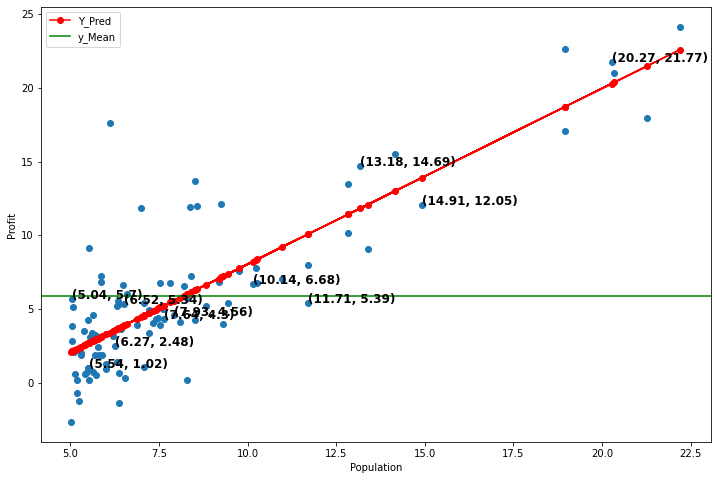

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(X,Y)
plt.plot(X,Y_pred,'ro-',label='Y_Pred')
### Plotting few coordinates of data points on the Graph
count=0
for i_x, i_y in zip(X, Y):
    if (count%7==0) and (count>20):
        plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y),fontsize=12,fontweight='bold')
    count=count+1
#############################
#plt.axvline(x=X_Mean,label='X_Mean',color='k') ## Removing the mean of X
plt.axhline(y=Y_Mean,label='y_Mean',color='g')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend()

In [31]:
## Checking by predicting few individual 'X'
Yp1=reg.predict(np.array ([[14.91]]))
Yp1

array([13.89214947])

In [32]:
# There is 70 % less variation around the predicted line than the mean line.
# OR Population/Profit relationship accounts for 70 % varition in data.

## Coefficient of Determination R2



![](https://drive.google.com/uc?export=view&id=15PJKLeCYQ72NC237HxTl-3drRiCAWv0H)



#####  Where,  
     yi --> Given y (Targets)
     y(bar) --> mean of given y 
     y(hat)--> Predicted y

In [33]:
Y

array([17.59,  9.13, 13.66, 11.85,  6.82, 11.89,  4.35, 12.  ,  6.6 ,
        3.82,  3.25, 15.51,  3.16,  7.23,  0.72,  3.51,  5.3 ,  0.56,
        3.65,  5.39,  3.14, 21.77,  4.26,  5.19,  3.08, 22.64, 13.5 ,
        7.05, 14.69, 24.15, -1.22,  6.  , 12.13,  1.85,  6.54,  4.56,
        4.12,  3.39, 10.12,  5.5 ,  0.56,  3.91,  5.39,  2.44,  6.73,
        1.05,  5.13,  1.84,  8.  ,  1.02,  6.75,  1.84,  4.29,  5.  ,
        1.42, -1.42,  2.48,  4.6 ,  3.96,  5.41,  5.17, -0.74, 17.93,
       12.05, 17.05,  4.89,  5.74,  7.78,  1.02, 20.99,  6.68,  4.03,
        1.28,  3.34, -2.68,  0.3 ,  3.88,  5.7 ,  6.75,  2.06,  0.48,
        0.2 ,  0.68,  7.54,  5.34,  4.24,  6.8 ,  0.93,  0.15,  2.82,
        1.85,  4.3 ,  7.2 ,  1.99,  0.14,  9.06,  0.62])

In [34]:
# TSS Calculation
TSS=np.var(Y-Y_Mean) ## Variation of Y Around the mean of Y ## Total Sum of Squares(TSS)
# Or simply :  np.var(Y) # Variance in data
TSS

30.048097417366353

In [35]:
np.var(Y)

30.048097417366353

In [36]:
# RSS Calculation
RSS=np.var(Y-Y_pred) ### Variation of Y around the predicted value Y_pred ## Residul Sum of squares
RSS

8.950742126692887

In [37]:
# Coefficient of Determination ( R2) Calculation
R2=1-(RSS/TSS)
R2

0.702119505193038

In [38]:
 ### In one go
R2=(np.var(Y-Y_Mean)-np.var(Y-Y_pred))/np.var(Y-Y_Mean) ## This is the Coefficient of determination R2
R2

0.702119505193038

### Interpretation
##### There is  70 % less variation  around the predicted line than the mean line.


#### There is one more term : Explained Sum of Squres(SSE)

In [39]:
ESS= np.var(Y_pred-Y_Mean) ## Explained Sum of Squres(ESS)
print(ESS)
print(RSS) ## RSS= Var (Y-Ypred)
print(TSS) ## TSS = Var (Y-Ymean)
print(RSS+ESS)  #  = TSS, Thus TSS = RSS + ESS 

21.097355290673452
8.950742126692887
30.048097417366353
30.04809741736634


 #### Total sum of squares ( TSS ) = Explained sum of squares (ESS)+ Residual sum of squares (RSS) -->(Unexplainded)

## Gaussian/Normal Distribution

In [40]:
iris=pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
x=iris['SepalLengthCm'].values
print('sepal_length_data \n: ', x)
print('Total number of data/entries : ', len(x))
xm=x.mean()
print('Meand value : ', xm)
x_std=np.std(x)
print('Standard deviation : ', x_std)

sepal_length_data 
:  [5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]
Total number of data/entries :  150
Meand value :  5.843333333333334
Standard deviation :  0.8253012917851409


In [42]:
x.sort()
x

array([4.3, 4.4, 4.4, 4.4, 4.5, 4.6, 4.6, 4.6, 4.6, 4.7, 4.7, 4.8, 4.8,
       4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 5. , 5. , 5. , 5. ,
       5. , 5. , 5. , 5. , 5. , 5. , 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1,
       5.1, 5.1, 5.2, 5.2, 5.2, 5.2, 5.3, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4,
       5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6,
       5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.8, 5.8, 5.8, 5.8, 5.8,
       5.8, 5.8, 5.9, 5.9, 5.9, 6. , 6. , 6. , 6. , 6. , 6. , 6.1, 6.1,
       6.1, 6.1, 6.1, 6.1, 6.2, 6.2, 6.2, 6.2, 6.3, 6.3, 6.3, 6.3, 6.3,
       6.3, 6.3, 6.3, 6.3, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.5, 6.5,
       6.5, 6.5, 6.5, 6.6, 6.6, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7,
       6.8, 6.8, 6.8, 6.9, 6.9, 6.9, 6.9, 7. , 7.1, 7.2, 7.2, 7.2, 7.3,
       7.4, 7.6, 7.7, 7.7, 7.7, 7.7, 7.9])

Understanding Histogram :

In [43]:
count,x_bins=np.histogram(x,bins=10) 
print( 'Count : ' , count , '\n' , ' Bins : ', x_bins)
len(count),len(x_bins)

Count :  [ 9 23 14 27 16 26 18  6  5  6] 
  Bins :  [4.3  4.66 5.02 5.38 5.74 6.1  6.46 6.82 7.18 7.54 7.9 ]


(10, 11)

Plotting Histogram :

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

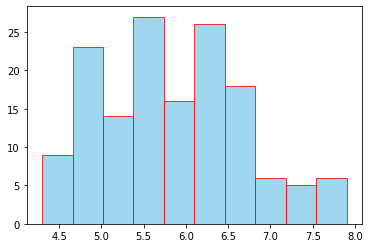

In [44]:
plt.hist(x,10, color='skyblue',alpha=0.8,label = 'Setosa',edgecolor='r')
# first argument is data, second argument is bins into which data is divided. Visit the documentation 
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html


Understanding Gaussian/Normal Distribution

**PDF Equation :** 
$ f(x) = \frac{1}{\sigma\sqrt{2\pi}} 
  \exp\left( -\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{\!2}\,\right) $

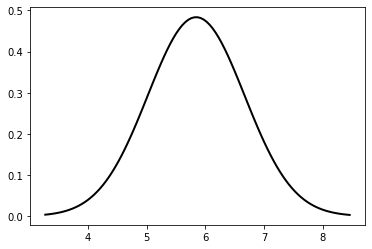

In [45]:
# We are using above calculated : mean : xm, Standard deviation: x_std, 
np.random.seed(0)
xn = np.random.normal(xm, x_std, 3000)
count,x_bins=np.histogram(xn,bins=100) #count > number of  data inside particular range
y=(1/(x_std * np.sqrt(2 * np.pi))) *np.exp( - (x_bins - xm)**2 / (2 * x_std**2)) #f(x)
plt.plot(x_bins,y,'k-',linewidth=2)
plt.show()

#### Now checking whether Sepal length data follow the Normal distribution or not.

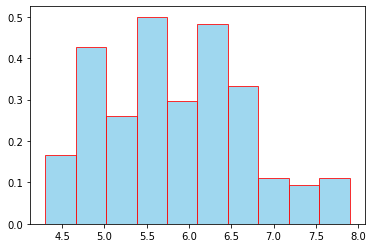

In [46]:
x=iris['SepalLengthCm'].values
w1, x1, z1=plt.hist(x, 10, density=True, color='skyblue',alpha=0.8,label = 'Setosa',edgecolor='r') #hist density=True,
plt.show()

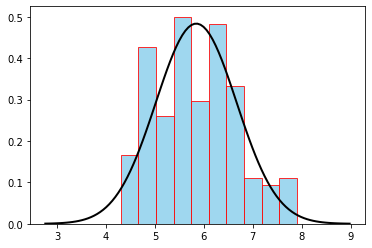

In [47]:
# We are using above calculated : mean : xm, Standard deviation: x_std, 
xn = np.random.normal(xm, x_std, 3000)
count,x_bins=np.histogram(xn,bins=100) #count > number of  data inside particular range
y=(1/(x_std * np.sqrt(2 * np.pi))) *np.exp( - (x_bins - xm)**2 / (2 * x_std**2)) #f(x)
plt.plot(x_bins,y,'k-',linewidth=2)
w1, x1, z1=plt.hist(x, 10, density=True, color='skyblue',alpha=0.8,label = 'Setosa',edgecolor='r') #hist
plt.show()

### Creating function for generating Gaussian plot along with histogarm of dataset

In [48]:
# We are using above calculated : mean : xm, Standard deviation: x_std
x=iris['SepalLengthCm'].values
def Gaussian_plot(x,hist_bins=10):
  x_std=np.std(x)
  xm=x.mean()
  xn = np.random.normal(xm, x_std, 3000)
  count,x_bins=np.histogram(xn,bins=100) #count > number of  data inside particular range
  y=(1/(x_std * np.sqrt(2 * np.pi))) *np.exp( - (x_bins - xm)**2 / (2 * x_std**2)) #f(x)
  plt.plot(x_bins,y,'k-',linewidth=2)
  w1, x1, z1=plt.hist(x, hist_bins, density=True, color='skyblue',alpha=0.8,label = 'Setosa',edgecolor='r') #hist
  plt.show()

In [49]:
# Plot for Sepal Width 
x=iris['SepalWidthCm'].values
# Gaussian_plot(x,hist_bins=20)

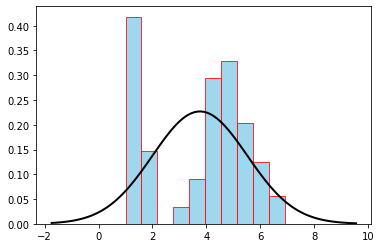

In [50]:
# Plot for Petal Length 
x=iris['PetalLengthCm'].values
Gaussian_plot(x,hist_bins=10)

## Applying the concept of Normal distribution for filling the null value

In [51]:
titanic = pd.read_csv("titanic.csv")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


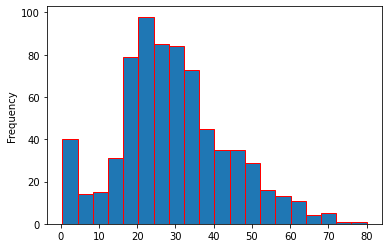

In [53]:
titanic['Age'].plot(kind='hist',bins=20,edgecolor='r')

In [54]:
# Gaussian Plot for Age data  
x=titanic['Age'].values
Gaussian_plot(x,hist_bins=20)

ValueError: ignored

In [ ]:
age_avg = titanic['Age'].mean()
print('Mean of Age data : ', age_avg)
age_std =titanic['Age'].std()
print('Stadard deviation of Age data : ' ,age_std)
age_null_count = titanic['Age'].isnull().sum()
print('Count of null entries in Age column : ', age_null_count)

In [ ]:
30+14

In [ ]:
30-14

In [ ]:
## Generating 177 random number from the same distribution as that of Age column data
np.random.seed(0)
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
age_null_random_list

In [ ]:
titanic['Age'].isnull().sum() # Or --> np.isnan(titanic['Age']).sum()

In [ ]:
titanic.loc[np.isnan(titanic['Age']),'Age'].index

In [ ]:
titanic.loc[np.isnan(titanic['Age']),'Age'] = age_null_random_list

In [ ]:
titanic['Age'].isnull().sum()

In [ ]:
titanic.iloc[17,5]

## Using built in function from scipy library for plotting Gaussian Density Funciton


In [ ]:
from scipy.stats import norm

In [ ]:
# Normal Distribution with scipy library
x=iris['SepalLengthCm'].values
x_std=np.std(x)
xm=x.mean()
x_min = min(x)
x_max = max(x)
x = np.linspace(x_min, x_max, 100)
##Normalization
xn=(x-xm)/x_std
y = norm.pdf(xn,0,1)# After normalization mean=0 and std=1
plt.plot(x,y, color='y')